In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from utils.utils import plot_histogram, QQ_plot

sns.set_theme(font_scale=1.5, style="whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:6]

%load_ext autoreload
%autoreload 2

In [2]:
times = pd.read_csv('cache/times.csv', index_col=1, parse_dates=True).index

returns_BTC = pd.read_csv('../data/BTC_returns.csv', index_col=0, parse_dates=True).squeeze().loc[times[0]:times[-1]]; returns_BTC.name = 'BTC'
returns_ETH = pd.read_csv('../data/ETH_returns.csv', index_col=0, parse_dates=True).squeeze().loc[times[0]:times[-1]]; returns_ETH.name = 'ETH'
returns_industry = pd.read_csv('../data/industry_returns.csv', index_col=0, parse_dates=True).loc[times[0]:times[-1]] / 100
returns = pd.concat([returns_BTC, returns_ETH, returns_industry], axis=1).loc[times[0]:times[-1]]
returns_sp500 = pd.read_csv('../data/SP500_returns.csv', index_col=0, parse_dates=True).squeeze().loc[times[0]:times[-1]]

log_returns = np.log(1+returns)
log_returns_sp500 = np.log(1+returns_sp500)

# Plot 

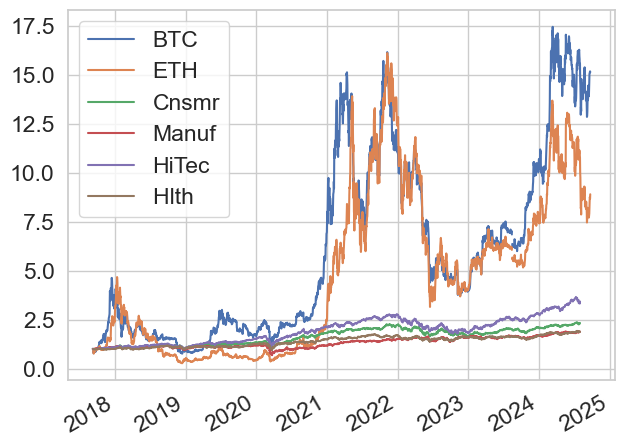

In [3]:
(1+returns.iloc[:, :-1]).cumprod().plot(color=colors);
plt.tight_layout()
# plt.savefig('/Users/kasper/Documents/Stanford/Research/My papers/crypto/crypto_paper/figures/all_prices.png')

# Plot prices

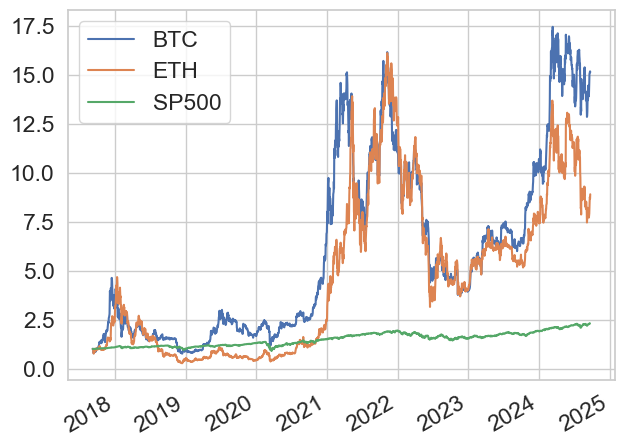

In [4]:
(1+returns_BTC).cumprod().plot(label='BTC')
(1+returns_ETH).cumprod().plot(label='ETH')
(1+returns_sp500).cumprod().plot(label='SP500')
# plt.yscale('log')
plt.legend()
plt.xlabel('')
plt.tight_layout()
directory = '/Users/kasper/Documents/Stanford/Research/My papers/crypto/crypto_paper/figures/'
# plt.savefig(f'{directory}asset_values.png')
plt.show()

# Statistical analysis

In [5]:
halflife = 63
volas = returns.ewm(halflife=halflife, min_periods=halflife).std().shift(1)
returns_adj = returns / volas
returns_sp500_adj = returns_sp500 / returns_sp500.ewm(halflife=halflife, min_periods=halflife).std().shift(1)

volas_log = log_returns.ewm(halflife=halflife, min_periods=halflife).std().shift(1)
log_returns_adj = log_returns / volas_log
log_returns_sp500_adj = log_returns_sp500 / log_returns_sp500.ewm(halflife=halflife, min_periods=halflife).std().shift(1)

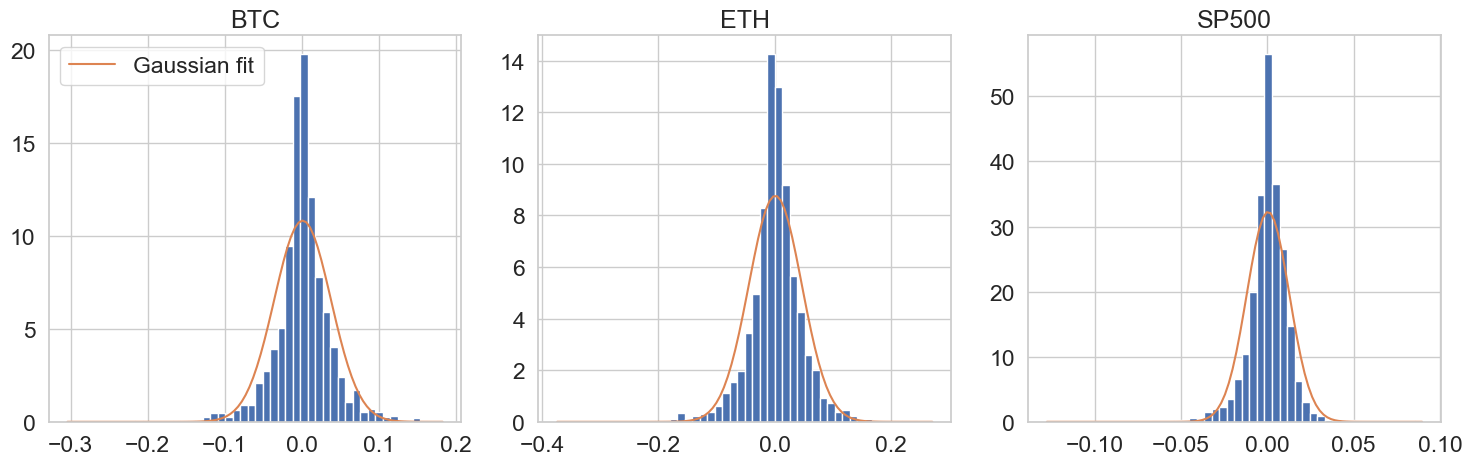

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_histogram(log_returns['BTC'], ax[0], bins=50, gaussian_fit=True, legend=True)
plot_histogram(log_returns['ETH'], ax[1], bins=50, gaussian_fit=True)
plot_histogram(log_returns_sp500, ax[2], bins=50, gaussian_fit=True)
ax[0].set_title('BTC')
ax[1].set_title('ETH')
ax[2].set_title('SP500')
plt.tight_layout()
plt.show()

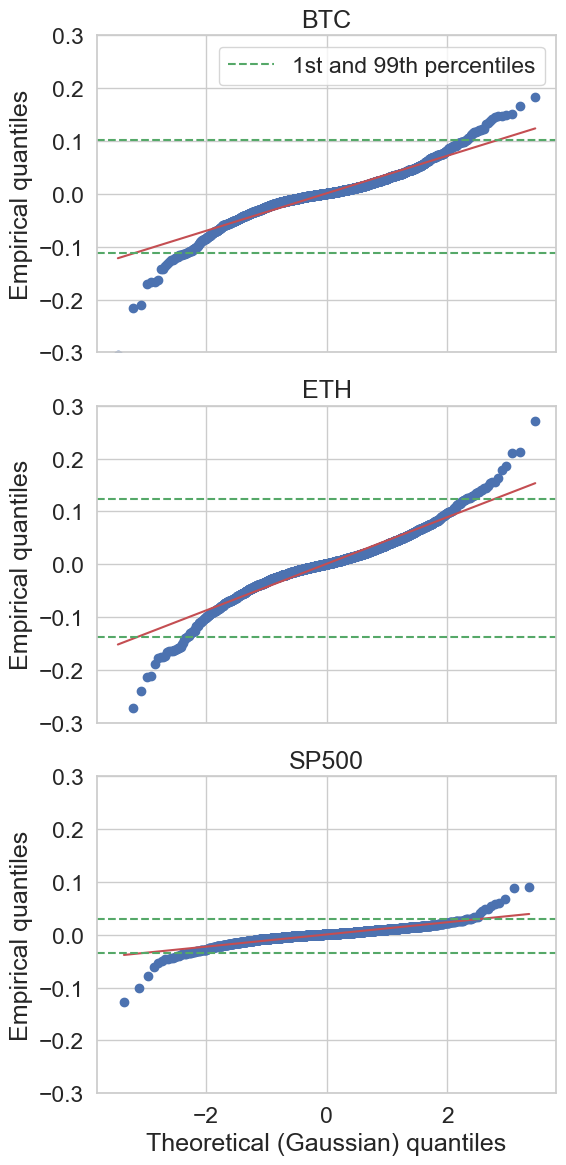

In [7]:
directory = '/Users/kasper/Documents/Stanford/Research/My papers/crypto/crypto_paper/figures/'

def add_percentile_lines(ax, data, legend=False):
    p1 = np.percentile(data, 1)
    p99 = np.percentile(data, 99)
    if legend:
        ax.axhline(p1, color='g', linestyle='--', label='1st and 99th percentiles')
    else:
        ax.axhline(p1, color='g', linestyle='--')
    ax.axhline(p99, color='g', linestyle='--')

# Set up subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True)

# Plot BTC log returns
stats.probplot(log_returns['BTC'].dropna(), dist="norm", plot=axs[0])
add_percentile_lines(axs[0], log_returns['BTC'].dropna(), legend=True)

# Plot ETH log returns
stats.probplot(log_returns['ETH'].dropna(), dist="norm", plot=axs[1])
add_percentile_lines(axs[1], log_returns['ETH'].dropna())

# Plot SP500 log returns
stats.probplot(log_returns_sp500.dropna(), dist="norm", plot=axs[2])
add_percentile_lines(axs[2], log_returns_sp500.dropna())

axs[0].set_title('BTC')
axs[1].set_title('ETH')
axs[2].set_title('SP500')
axs[0].legend()
axs[0].set_ylabel('Empirical quantiles')
axs[1].set_ylabel('Empirical quantiles')
axs[2].set_ylabel('Empirical quantiles')
axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('Theoretical (Gaussian) quantiles')

axs[0].set_ylim(-0.3, 0.3)
axs[1].set_ylim(-0.3, 0.3)
axs[2].set_ylim(-0.3, 0.3)
plt.tight_layout()
# plt.savefig(f'{directory}QQ_plot_log_returns.png')
plt.show()


# Metrics

In [8]:
from utils.metrics import Metrics

In [9]:
metrics_BTC = Metrics(pd.DataFrame(pd.Series(index=returns_BTC.index, data=1., name='BTC')), pd.DataFrame(pd.Series(index=returns_BTC.index, data=0.)), pd.DataFrame(returns_BTC))
metrics_ETH = Metrics(pd.DataFrame(pd.Series(index=returns_ETH.index, data=1., name='ETH')), pd.DataFrame(pd.Series(index=returns_ETH.index, data=0.)), pd.DataFrame(returns_ETH))
metrics_SP500 = Metrics(pd.DataFrame(pd.Series(index=returns_sp500.index, data=1., name='Adj Close')), pd.DataFrame(pd.Series(index=returns_sp500.index, data=0.)), pd.DataFrame(returns_sp500))

In [10]:
print('BTC', pd.DataFrame(metrics_BTC.summary))
print('\nETH', pd.DataFrame(metrics_ETH.summary))
print('\nSP500', pd.DataFrame(metrics_SP500.summary))

BTC                      0
Mean return   0.432560
Volatility    0.580616
Sharpe ratio  0.745002
Max drawdown  0.832945

ETH                      0
Mean return   0.470388
Volatility    0.716320
Sharpe ratio  0.656673
Max drawdown  0.939457

SP500                      0
Mean return   0.136698
Volatility    0.194814
Sharpe ratio  0.701689
Max drawdown  0.339250


# TODO: CDF

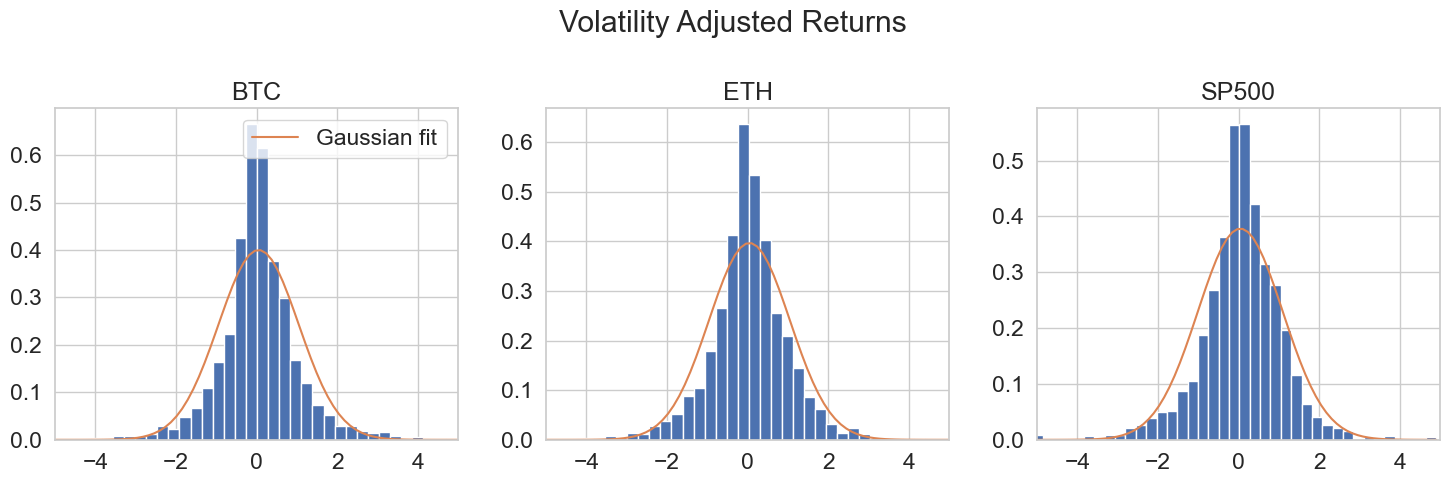

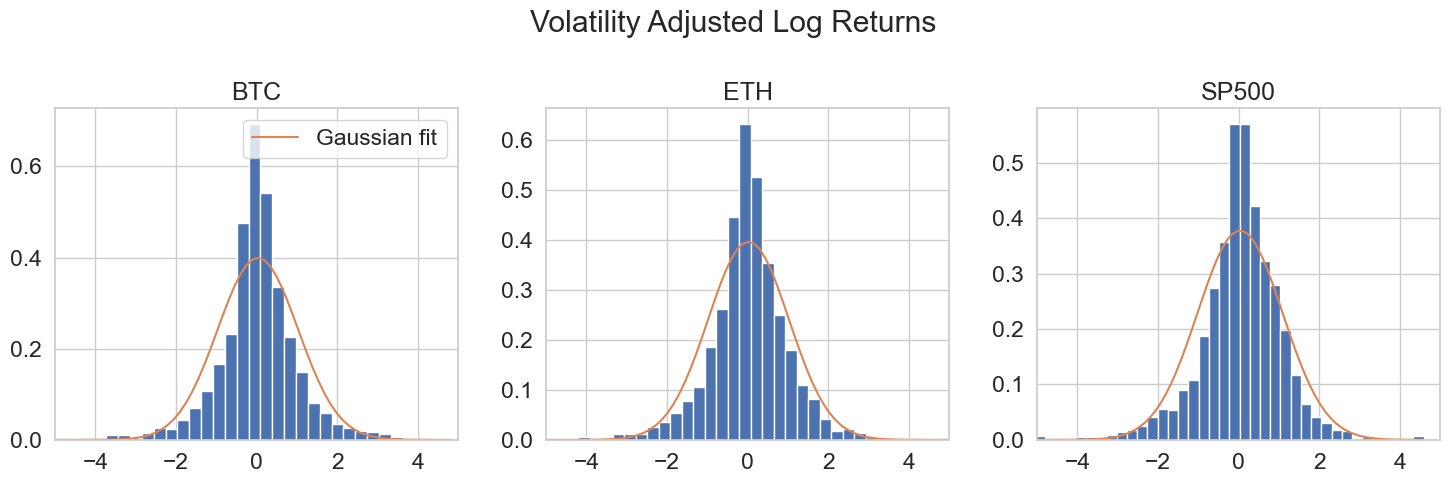

In [11]:
# returns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_histogram(returns_adj['BTC'], ax[0], bins=50, gaussian_fit=True, legend=True)
plot_histogram(returns_adj['ETH'], ax[1], bins=50, gaussian_fit=True)
plot_histogram(returns_sp500_adj, ax[2], bins=50, gaussian_fit=True)
ax[0].set_title('BTC')
ax[1].set_title('ETH')
ax[2].set_title('SP500')
ax[0].set_xlim(-5, 5)
ax[1].set_xlim(-5, 5)
ax[2].set_xlim(-5, 5)
plt.suptitle('Volatility Adjusted Returns')
plt.tight_layout()
plt.show()

# log returns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_histogram(log_returns_adj['BTC'], ax[0], bins=50, gaussian_fit=True, legend=True)
plot_histogram(log_returns_adj['ETH'], ax[1], bins=50, gaussian_fit=True)
plot_histogram(log_returns_sp500_adj, ax[2], bins=50, gaussian_fit=True)
ax[0].set_title('BTC')
ax[1].set_title('ETH')
ax[2].set_title('SP500')
ax[0].set_xlim(-5, 5)
ax[1].set_xlim(-5, 5)
ax[2].set_xlim(-5, 5)
plt.suptitle('Volatility Adjusted Log Returns')
plt.tight_layout()
plt.show()

# Price series

In [12]:
prices = (1 + returns).cumprod()
prices_sp500 = (1 + returns_sp500).cumprod()

prices_adj = (1 + returns_adj).loc['2018':].cumprod()
prices_sp500_adj = (1 + returns_sp500_adj).cumprod()

drawdowns = (1 - prices / prices.cummax())
drawdowns_sp500 = (1 - prices_sp500 / prices_sp500.cummax())

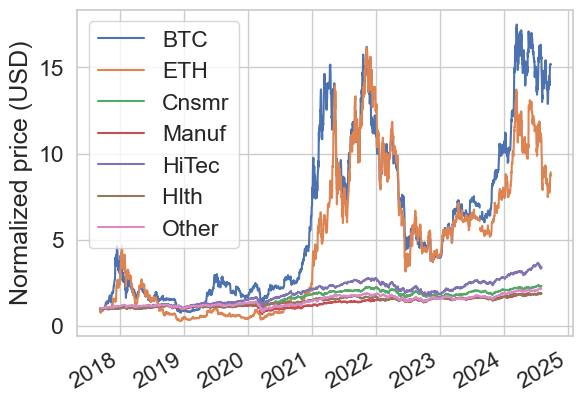

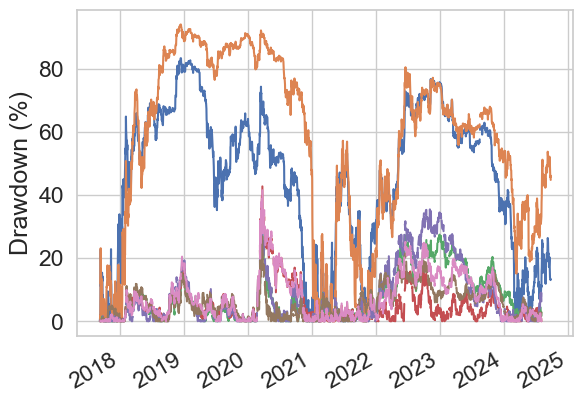

In [13]:
prices.plot();
plt.ylabel('Normalized price (USD)')
(drawdowns * 100).plot(label=None);
plt.legend().remove()
plt.ylabel('Drawdown (%)');

# Standardized returns

In [14]:
halflife = 10
sigmas_BTC = log_returns['BTC'].ewm(halflife=halflife, min_periods=halflife).std().shift(1)
sigmas_ETH = log_returns['ETH'].ewm(halflife=halflife, min_periods=halflife).std().shift(1)
sigmas_SP500 = log_returns_sp500.ewm(halflife=halflife, min_periods=halflife).std().shift(1)

log_returns_adj_BTC = returns_BTC / sigmas_BTC
log_returns_adj_ETH = returns_ETH / sigmas_ETH
log_returns_adj_SP500 = returns_sp500 / sigmas_SP500

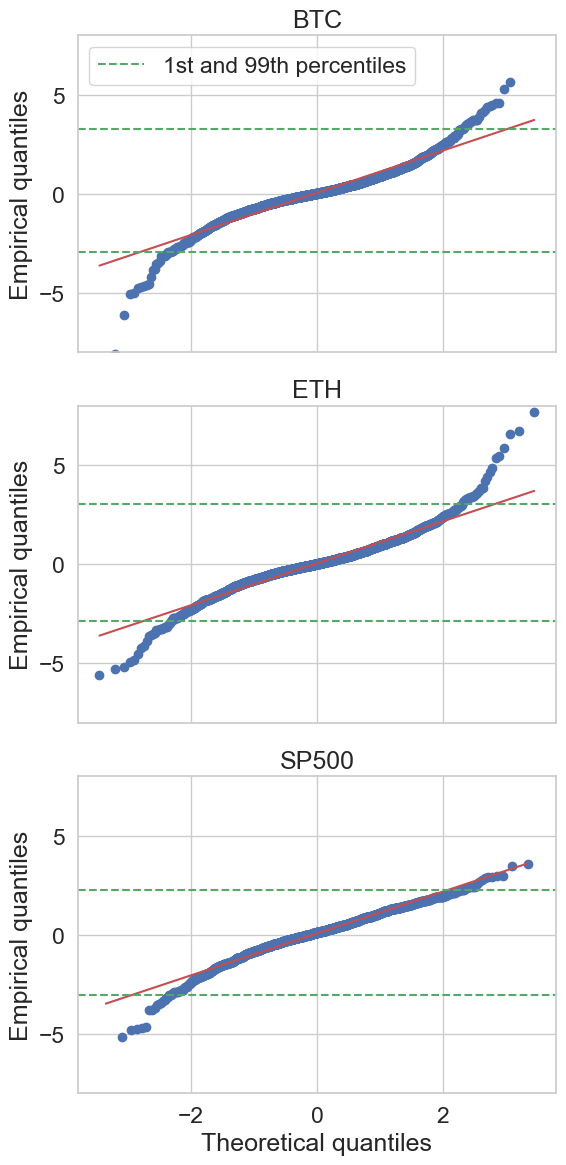

In [15]:
def add_percentile_lines(ax, data, legend=False):
    p1 = np.percentile(data, 1)
    p99 = np.percentile(data, 99)
    if legend:
        ax.axhline(p1, color='g', linestyle='--', label='1st and 99th percentiles')
    else:
        ax.axhline(p1, color='g', linestyle='--')
    ax.axhline(p99, color='g', linestyle='--')

# Set up subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True)

# Plot BTC log returns
stats.probplot(log_returns_adj_BTC.dropna(), dist="norm", plot=axs[0])
add_percentile_lines(axs[0], log_returns_adj_BTC.dropna(), legend=True)

# Plot ETH log returns
stats.probplot(log_returns_adj_ETH.dropna(), dist="norm", plot=axs[1])
add_percentile_lines(axs[1], log_returns_adj_ETH.dropna())

# Plot SP500 log returns
stats.probplot(log_returns_adj_SP500.dropna(), dist="norm", plot=axs[2])
add_percentile_lines(axs[2], log_returns_adj_SP500.dropna())

axs[0].set_title('BTC')
axs[1].set_title('ETH')
axs[2].set_title('SP500')
axs[0].legend()
axs[0].set_ylabel('Empirical quantiles')
axs[1].set_ylabel('Empirical quantiles')
axs[2].set_ylabel('Empirical quantiles')
axs[0].set_xlabel('')
axs[1].set_xlabel('')

axs[0].set_ylim(-8, 8)
axs[1].set_ylim(-8, 8)
axs[2].set_ylim(-8, 8)

plt.tight_layout()
plt.show()